Data Analysis on Pyber - A Fictional Ride Sharing Company

Based on the pie charts, urban cities make up the majority of total fares, total rides and driver count. 
62.7% of total fares come from urban cities while 30.5% from suburban and 6.8% from rural cities. 
68.4% of total rides are from urban cities while 26.3% from suburban and 5.3% from rural cities.
80.9% of total drivers are from urban cities while 16.5% from suburban and 2.6% from rural cities. 

Based on the bubble plot, there is a negative linear relationship between the total number of rides and average fares. As total number of rides increases, the average fare decreases. At first glance, it may seem that there is a strong correlation between these two variables. But that is just because the circle size correlating to driver count makes it look like the plots are closely bunched together. If the plot sizes are made to be similar, it can be seen that the dots are actually more spread out, implying a moderate correlation only.This relationship applies to all city types.

The bubble plot also shows that the driver count and total number of rides in urban cities are significantly higher compared to suburban and rural cities. Average fares are lowest in urban cities, followed by sub-urban and then rural cities. This bubble plot is in a way, visualizing the law of supply and demand in economics. 

In [32]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_pd = pd.read_csv(city_data_to_load)
ride_data_pd = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_data = pd.merge(ride_data_pd, city_data_pd, on="city", how="outer")

# Display the data table for preview
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

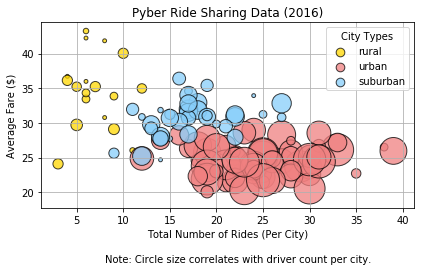

In [33]:
# DataFrames for each city type 
rural = pyber_data[pyber_data['type'] == 'Rural']
suburban = pyber_data[pyber_data['type'] == 'Suburban']
urban = pyber_data[pyber_data['type'] == 'Urban']

# Grouped by city
grouped_rural = rural.groupby("city")
grouped_suburban = suburban.groupby("city")
grouped_urban = urban.groupby("city")

# Obtain the x and y coordinates for each of the three city types
x_rural = grouped_rural["ride_id"].count()
x_suburban = grouped_suburban["ride_id"].count()
x_urban = grouped_urban["ride_id"].count()

y_rural = grouped_rural["fare"].mean()
y_suburban = grouped_suburban["fare"].mean()
y_urban = grouped_urban["fare"].mean()


# Obtain total total number of driver per city, grouped by city type
driver_rural = grouped_rural["driver_count"].mean()
driver_suburban = grouped_suburban["driver_count"].mean()
driver_urban = grouped_urban["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(x_rural, y_rural, marker="o", facecolors="gold", edgecolors="black",
            s=driver_rural*15, alpha=0.75, label = "rural")
plt.scatter(x_urban, y_urban, marker="o", facecolors="lightcoral", edgecolors="black",
            s=driver_urban*15, alpha=0.75, label = "urban")
plt.scatter(x_suburban, y_suburban, marker="o", facecolors="lightskyblue", edgecolors="black",
            s=driver_suburban*15, alpha=0.75, label = "suburban")


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
legend = plt.legend(frameon = True, title="City Types")
legend.legendHandles[0]._sizes = [75]
legend.legendHandles[1]._sizes = [75]
legend.legendHandles[2]._sizes = [75]

# Incorporate a text label regarding circle size
plt.text(8, 10, "Note: Circle size correlates with driver count per city.")
plt.tight_layout()

# Save Figure
plt.savefig("PyberRideSharingData2016.png")

## Total Fares by City Type

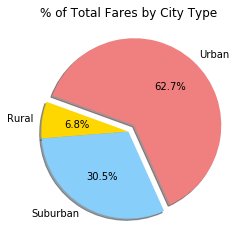

In [34]:
# Get total fares by city type
fare_list = pyber_data.groupby(["type"]).sum()["fare"]

# Create lists
citytype_list = ["Rural", "Suburban", "Urban" ] 
color_list = ["gold", "lightskyblue", "lightcoral" ]

# Build Pie Chart
plt.pie(fare_list, labels=citytype_list, colors=color_list, startangle = 160, explode=(0, 0, 0.1), shadow=True, autopct='%1.1f%%')
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Percent_of_Total_Fares_by_City_Type.png")

## Total Rides by City Type

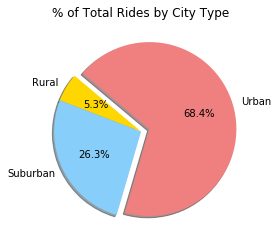

In [35]:
# Get total rides by city type
ride_list = pyber_data.groupby(["type"]).count()["ride_id"]

# Build Pie Chart
plt.pie(ride_list, labels=citytype_list, colors=color_list, startangle = 140, explode=(0, 0, 0.1), shadow=True, autopct='%1.1f%%')
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Percent_of_Total_Rides_by_City_Type.png")

## Total Drivers by City Type

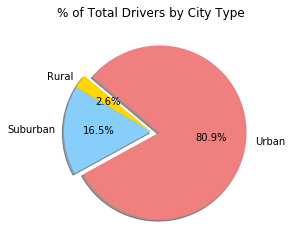

In [36]:
# Get total drivers by city type
driver_list = city_data_pd.groupby(["type"]).sum()["driver_count"]

# Build Pie Chart
plt.pie(driver_list, labels=citytype_list, colors=color_list, startangle = 140, explode=(0, 0, 0.1), shadow=True, autopct='%1.1f%%')
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Percent_of_Total_Drivers_by_City_Type.png")
